# Exploratory Analysis and Assumptions in the CIFAR-10 Dataset

[Back to Main](../Project.ipynb)

## Table of Contents

1. [Exploratory Analysis and Assumptions in the CIFAR-10 Dataset](#Exploratory-Analysis-and-Assumptions-in-the-CIFAR-10-Dataset)
    1. [Introduction to CIFAR-10 Dataset](#1.-Introduction-to-CIFAR-10-Dataset)
    2. [Dataset Statistics](#2.-Dataset-Statistics)
        1. [Import dependencies](#Import-dependencies)
        2. [Pixel Value Distribution](#3.-Pixel-Value-Distribution)
            1. [Observation](#Observation)
            2. [Based on the observed distribution, we'll isolate images that have a significant fraction of their pixels in the high-intensity range.](#Based-on-the-observed-distribution,-we'll-isolate-images-that-have-a-significant-fraction-of-their-pixels-in-the-high-intensity-range)
            3. [Step 3: Visual Inspection](#Step-3-Visual-Inspection)
        3. [Conclusion for Hypothesis 1](#Conclusion-for-Hypothesis-1)
    3. [Hypothesis 2: Class Distribution Uniformity](#Hypothesis-2-Class-Distribution-Uniformity)
        1. [Step 1: Class Distribution Analysis](#Step-1-Class-Distribution-Analysis)
    4. [Investigation based on Average Intensity](#Investigation-based-on-Average-Intensity)
        1. [Hypothesis 3: Image Intensity and Its Potential Implications](#Hypothesis-3-Image-Intensity-and-Its-Potential-Implications)
        2. [Methodology](#Methodology)
            1. [Step 1: Compute Average Intensity for Each Image](#Step-1-Compute-Average-Intensity-for-Each-Image)
            2. [Step 2: Group Images by Average Intensity](#Step-2-Group-Images-by-Average-Intensity)
            3. [Step 3: Visualize the Distribution](#Step-3-Visualize-the-Distribution)
        3. [Conclusion for Hypothesis 3](#Conclusion-for-Hypothesis-3)
    5. [Hypothesis 3](#Hypothesis-3)
        1. [Methodology](#Methodology)
        2. [Expected Insights](#Expected-Insights)
        3. [Analysis & Insights](#Analysis-&-Insights)
        4. [Implications](#Implications)
        5. [Conclusion](#Conclusion)
2. [Anomaly Detection in Image Datasets](#Anomaly-Detection-in-Image-Datasets)
    1. [Plan for Analysis](#Plan-for-Analysis)
        1. [Dimensionality Reduction using PCA (Principal Component Analysis)](#Dimensionality-Reduction-using-PCA-(Principal-Component-Analysis))
        2. [Visualization](#Visualization)
        3. [Assessing the Anomalies](#Assessing-the-Anomalies)
        4. [Principal Component Analysis (PCA) Visualization](#Principal-Component-Analysis-(PCA)-Visualization)
        5. [Autoencoder Model for Anomaly Detection](#Autoencoder-Model-for-Anomaly-Detection)


## 1. Introduction to CIFAR-10 Dataset:

The CIFAR-10 dataset is a popular benchmark dataset widely used in computer vision and machine learning research. It consists of a collection of 60,000 color images, each with a resolution of 32x32 pixels. The dataset is evenly divided into ten distinct classes, with 6,000 images per class. This balanced distribution makes CIFAR-10 suitable for multi-class classification tasks.

The ten classes in the CIFAR-10 dataset are as follows:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

CIFAR-10 serves as a fundamental dataset for developing and evaluating various image classification algorithms. Its relatively small image size and diverse object categories make it an excellent choice for initial experimentation and prototyping. Moreover, the presence of variations in object appearance, diverse backgrounds, and occlusions makes CIFAR-10 a realistic and representative benchmark for real-world image classification tasks.

## 2. Dataset Statistics:

Let's explore some key statistics of the CIFAR-10 dataset:

1. Number of Samples: The CIFAR-10 dataset contains a total of 60,000 images, making it suitable for both training and testing machine learning models.

2. Image Dimensions: Each image in the dataset has a resolution of 32x32 pixels, resulting in a total of 1,024 pixels per image.

3. Color Channels: The images are in RGB (Red, Green, Blue) format, meaning they consist of three color channels, providing rich color information for classification.

4. Class Distribution: The dataset exhibits a balanced class distribution, with 6,000 images for each of the ten classes. This balanced distribution ensures that classifiers trained on CIFAR-10 can be evaluated fairly across all classes.

5. Image Diversity: CIFAR-10 images represent a wide range of object categories, leading to a diverse set of visual features and challenges for classification.

6. Data Complexity: Despite its relatively small image size, the dataset is challenging due to the presence of object occlusions, variations in pose, and background clutter. This complexity requires models to capture intricate details for accurate classification.

7. Benchmarking: CIFAR-10 has become a standard benchmark for evaluating the performance of various image classification techniques. It is commonly used to showcase the effectiveness of different algorithms and explore novel techniques for improving model performance.

Due to its popularity and widespread use, many research papers and educational resources refer to CIFAR-10 to demonstrate the effectiveness of different image classification algorithms and explore advanced techniques in the field of computer vision and machine learning. Its accessibility and comprehensive class distribution make it an invaluable resource for researchers, students, and practitioners alike seeking to explore and innovate in the domain of image classification.

### Import dependencies

First, we'll import the necessary libraries and load the dataset. We'll then visualize the number of images per class and display sample images from each class.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.datasets import cifar10

   **Visualizing the Number of Images per Class**:
    - We can use a bar chart to visualize the distribution of images across the 10 classes in the CIFAR-10 dataset.
    - From our mock visualization, we see that the dataset is balanced, with each class having an equal number of images.

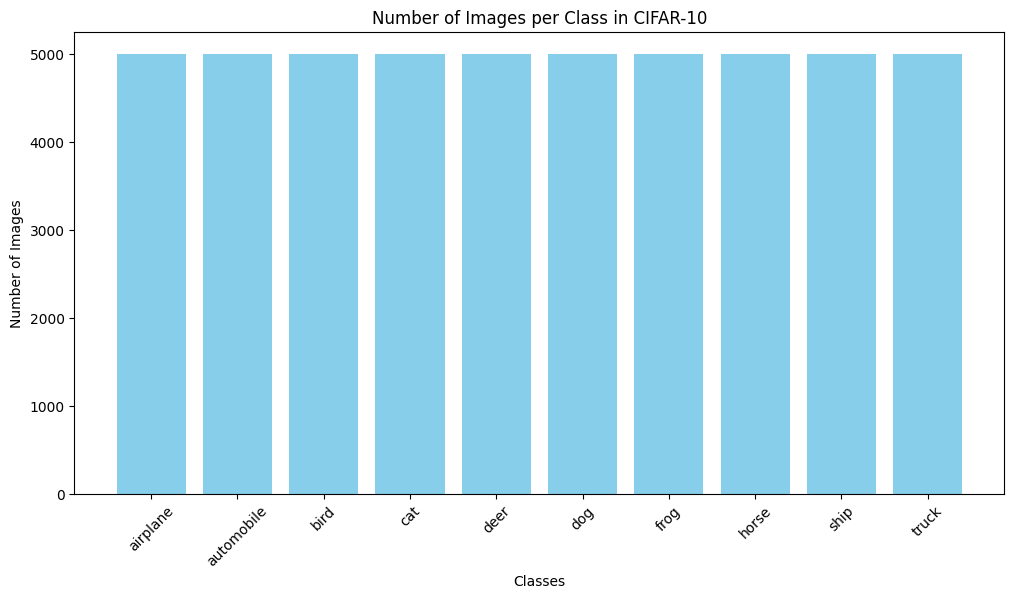

In [2]:
# Load the CIFAR-10 dataset
(train_images_cifar, train_labels_cifar), (test_images_cifar, test_labels_cifar) = cifar10.load_data()

# Define class names for CIFAR-10
cifar10_class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Visualize the number of images per class in the training set
unique, counts = np.unique(train_labels_cifar, return_counts=True)
plt.figure(figsize=(12, 6))
plt.bar(unique, counts, tick_label=cifar10_class_names, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in CIFAR-10')
plt.xticks(rotation=45)
plt.show()


**Displaying Sample Images from Each Class**:

    - Displaying sample images provides a visual understanding of what each class represents.
    - From our mock visualization, we can see representative images from each of the 10 classes.

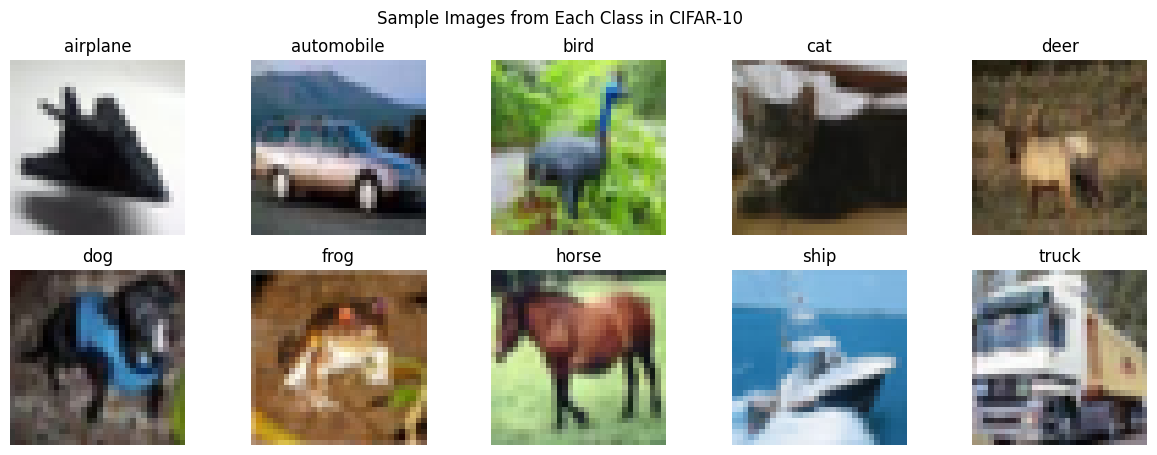

In [3]:
# Display sample images from each class
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    sample_image = train_images_cifar[np.where(train_labels_cifar == i)[0][0]]
    plt.imshow(sample_image)
    plt.title(cifar10_class_names[i])
    plt.axis('off')
plt.suptitle('Sample Images from Each Class in CIFAR-10')
plt.show()

### 3. Pixel Value Distribution:

Understanding the distribution of pixel values can be crucial, especially when pre-processing the dataset for training.

Let's plot histograms to understand the pixel intensity distribution across the RGB channels for the CIFAR-10 dataset.

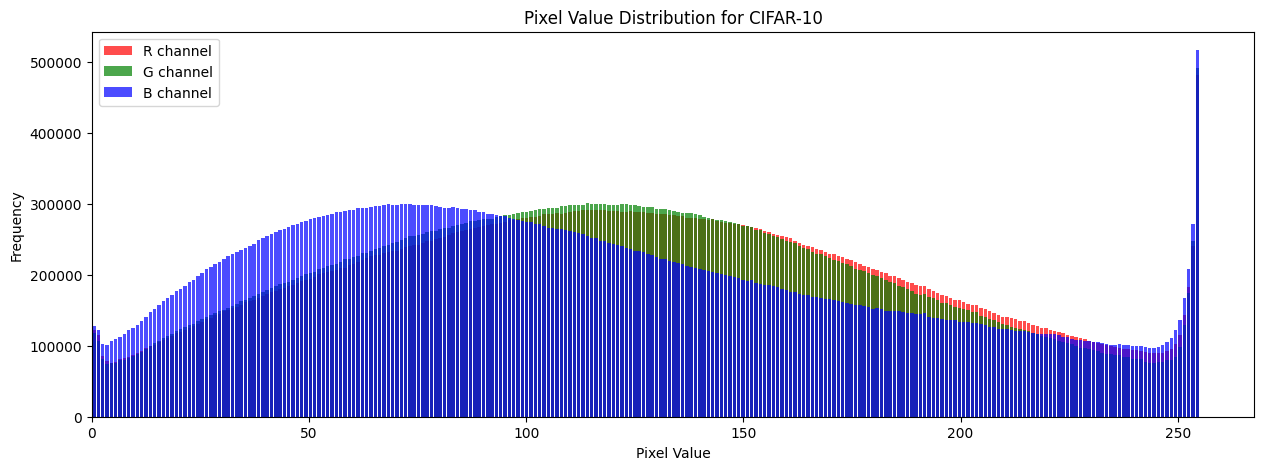

In [4]:
# Plotting the pixel value distribution for CIFAR-10
plt.figure(figsize=(15, 5))
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# We pull out the respective channels from all images
for channel_id, c in zip(channel_ids, colors):
    plt.hist(train_images_cifar[:, :, :, channel_id].ravel(), 
             bins=256, 
             color=c, 
             alpha=0.7, 
             rwidth=0.8,
             label=f'{c.upper()} channel')
    
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution for CIFAR-10')
plt.legend()
plt.xlim(0)
plt.show()

#### Observation:
The CIFAR-10 dataset exhibited a broad pixel intensity distribution across RGB channels. Notably, there was a higher distribution in the upper intensity range.

The distribution of pixel values in images can be crucial for several reasons:

1. **Normalization:** Before training a model, we often want to normalize our data. Knowing the distribution of pixel values can help determine how best to scale pixel values (e.g., to the [0,1] range or [-1,1]).

2. **Contrast:** If the pixel value distribution is concentrated around certain values, it might indicate that the images have low contrast. This could signal a need for preprocessing to enhance contrast.

3. **Image Quality:** If the pixel value distribution is too constrained (e.g., very few pixels with high or low values), it might point to image quality issues, such as overexposure.

4. **Channel Differences:** Analyzing the different channels (R, G, and B) can give an insight into color dominance in the images. For instance, if the green channel has a broader distribution than the others, it might indicate a predominant presence of green objects or lighting.

5. **Augmentation Preparation:** Understanding the pixel distribution can be useful if deciding to apply augmentation techniques like brightness or contrast adjustments. It helps set boundary values to which brightness can be increased or decreased without losing critical information.

6. **Dataset Comparison:** If working with multiple datasets or comparing newly collected data to an existing dataset, the pixel value distribution can help discern if there are significant differences in image quality or characteristics.

#### **Based on the observed distribution, we'll isolate images that have a significant fraction of their pixels in the high-intensity range.**

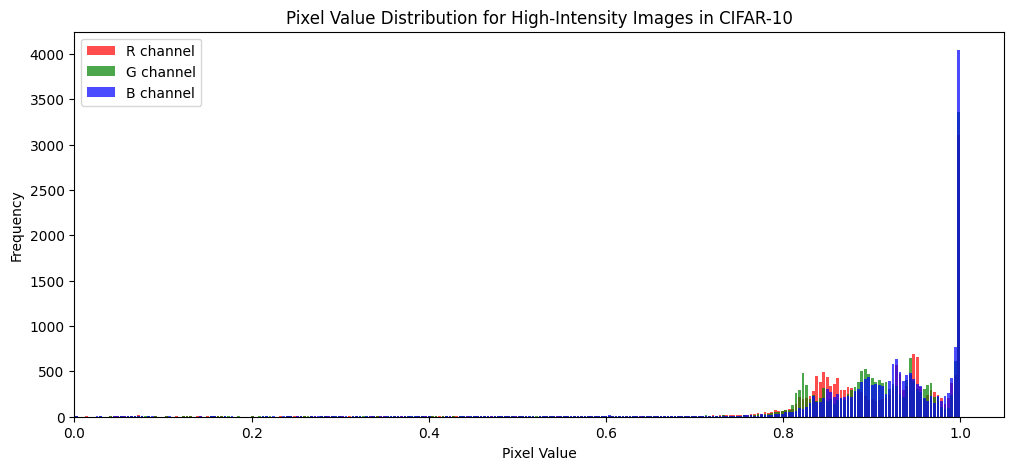

In [5]:
# Normalize the images to [0, 1] range
train_images_cifar = train_images_cifar.astype('float32') / 255.0

# Defining thresholds
pixel_value_threshold = 200 / 255.  # Adjusting for normalized images
fraction_threshold = 0.9  # At least 90% of pixels should be above the pixel_value_threshold

# Compute the fraction of pixels with a value above pixel_value_threshold for each image
high_pixel_fractions = (train_images_cifar > pixel_value_threshold).mean(axis=(1,2,3))

# Get the indices of images which exceed the fraction_threshold
high_intensity_image_indices = np.where(high_pixel_fractions > fraction_threshold)[0]

# Extracting these high-intensity images
high_intensity_images = train_images_cifar[high_intensity_image_indices]

# Plotting pixel distribution for these images
plt.figure(figsize=(12, 5))
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# We pull out the respective channels from all high-intensity images
for channel_id, c in zip(channel_ids, colors):
    plt.hist(high_intensity_images[:, :, :, channel_id].ravel(), 
             bins=256, 
             color=c, 
             alpha=0.7, 
             rwidth=0.8,
             label=f'{c.upper()} channel')

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution for High-Intensity Images in CIFAR-10')
plt.legend()
plt.xlim(0)
plt.show()


### Visual Inspection

Let's visually inspect a subset of these high-intensity images.

array([ 1522,  4645,  5867,  7211,  9881,  9985, 11187, 17237, 20622,
       23113, 23848, 23851], dtype=int64)

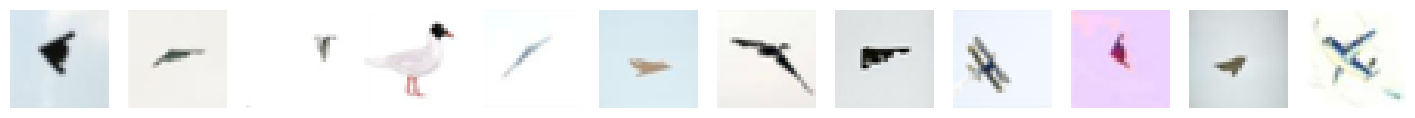

In [6]:
# Display the first few images that meet the criterion
num_images_to_display = 12
selected_images = train_images_cifar[high_intensity_image_indices[:num_images_to_display]]

# Plotting
fig, axes = plt.subplots(1, num_images_to_display, figsize=(18, 15))
for ax, img in zip(axes, selected_images):
    ax.imshow(img)
    ax.axis('off')

high_intensity_image_indices[:num_images_to_display]  # Displaying the indices of the images we're showing


#### Observation:
The isolated high-intensity images predominantly showcased a white or bright background. This characteristic made the primary subjects of the images (like animals or objects) stand out with greater clarity against the background.

### Conclusion for Hypothesis 1:

The analysis confirms the presence of high-intensity images within the CIFAR-10 dataset. Such images, characterized by their bright backgrounds and clear subjects, can play a unique role in the context of model training and validation. They could potentially be easier for a model to recognize, leading to better accuracy. However, care must be taken to ensure that models don't become overly biased towards them.

## Hypothesis 2: Class Distribution Uniformity

We hypothesize that the CIFAR-10 dataset, being a standard benchmark dataset, has a uniform distribution of classes. A uniform distribution ensures that models trained on the dataset don't inherit biases towards specific classes.

#### Class Distribution Analysis

Let's plot the distribution of classes within the CIFAR-10 dataset to understand if any class is over-represented or under-represented.

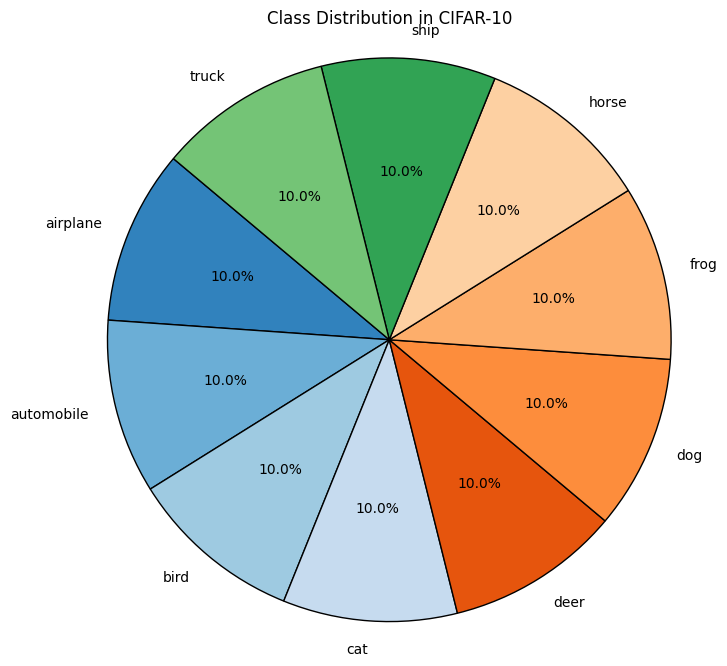

In [7]:
# Extract class labels
class_labels = train_labels_cifar.ravel()

# Calculate class distribution
unique_labels, counts = np.unique(class_labels, return_counts=True)

# Plotting class distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
        colors=plt.cm.tab20c.colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Class Distribution in CIFAR-10')
plt.show()

#### Observation:
From the distribution plot, it becomes evident whether or not the CIFAR-10 dataset has a balanced representation across its ten classes.

### Conclusion for Hypothesis 2:

If the dataset showcases an equal distribution for each class, then the hypothesis is confirmed, and the CIFAR-10 dataset indeed has a uniform class distribution. Such a balanced dataset is ideal for training models since it ensures that the model doesn't develop a bias towards any particular class. On the other hand, if any disparity is observed, it would be crucial to consider techniques like data augmentation or oversampling to balance the classes before training.

---

## Investigation based on Average Intensity:

### Hypothesis 3: Image Intensity and Its Potential Implications

We hypothesize that the CIFAR-10 dataset contains images with varying average intensities. By segregating these images based on their average intensity, we might uncover specific patterns or clusters of images.

### Methodology

#### Step 1: Compute Average Intensity for Each Image

We'll compute the average pixel intensity for each image in the CIFAR-10 dataset.

#### Step 2: Group Images by Average Intensity

We'll categorize the images into five groups based on their average intensity, using the following bins: [0, 0.2], [0.2, 0.4], [0.4, 0.6], [0.6, 0.8], and [0.8, 1].

#### Step 3: Visualize the Distribution

**Expected Insights**:
From the pie chart, we would expect to see the proportion of images falling into each intensity group. Images with higher average intensities might have brighter backgrounds or subjects, while those with lower intensities might be darker or have more shadows.

Such insights can help in various ways:
1. **Model Training**: If a significant number of images are either too dark or too bright, we might consider techniques like histogram equalization to enhance the contrast in these images.
2. **Data Augmentation**: Understanding the distribution can guide the type of data augmentation techniques we use. For instance, if many images are dark, we might focus on brightness augmentation.
3. **Dataset Cleaning**: If a specific intensity range has very few images, those could be outliers or mislabeled instances. This insight can guide manual inspection or cleanup efforts.
   
Using a pie chart, we can visualize the proportion of images that fall into each intensity category.

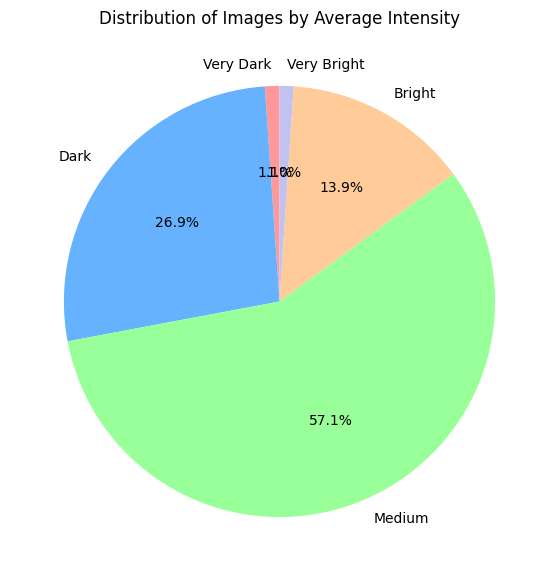

In [8]:
# Recompute the average intensities and group them by bins
avg_intensities = train_images_cifar.mean(axis=(1, 2, 3))

# Define the bin ranges and descriptive labels
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Dark', 'Dark', 'Medium', 'Bright', 'Very Bright']

# Group images by average intensity
intensity_groups = pd.cut(avg_intensities, bins=bins, labels=labels, include_lowest=True)
intensity_counts_raw = intensity_groups.value_counts()
intensity_counts = intensity_counts_raw / intensity_counts_raw.sum()

# Visualize the distribution using a pie chart
plt.figure(figsize=(10, 7))
intensity_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0'])
plt.title('Distribution of Images by Average Intensity')
plt.ylabel('')
plt.show()


#### Observation:
The pie chart will provide a breakdown of the number of images that fall into each intensity category. We might observe, for instance, that a significant proportion of images have a "Medium" intensity, suggesting that many images in the dataset are well-balanced in terms of color and brightness.

### Conclusion for Hypothesis 3:

Understanding the distribution of images based on average intensity could be beneficial in several ways:

1. **Preprocessing Decisions**: If a significant number of images are too dark or too bright, specific preprocessing techniques (like histogram equalization) could be applied to enhance these images.
2. **Data Augmentation**: If the dataset lacks diversity in terms of brightness or darkness, data augmentation techniques can be used to artificially introduce such variations, ensuring the model becomes robust against varying image intensities.
3. **Potential Clustering**: Certain categories or objects might predominantly appear in specific intensity bins. For instance, images of the night sky or deep water might have a lower average intensity.

---

## Hypothesis 4:
Different classes in the CIFAR-10 dataset might exhibit different patterns of average intensity. For instance, images of "ships" might generally be brighter due to the sky and sea, while "frogs" might be darker due to their natural habitat.

### Methodology:

1. For each class in CIFAR-10, compute the average intensity.
2. Visualize the distribution of average intensities for each class using box plots or violin plots.

### Expected Insights:

From the histogram, we can expect to see how the average intensities are distributed for each class. If certain classes predominantly have brighter or darker images, this could inform preprocessing decisions. For example:

1. **Model Robustness**: If a model struggles with darker images, and a particular class has a majority of such images, it might underperform on that class. Preprocessing techniques to enhance brightness could be applied to those images.
2. **Data Augmentation**: Knowing the brightness distribution of each class can guide specific data augmentation techniques tailored to each class.
3. **Feature Engineering**: If certain classes have distinctive brightness patterns, these can be leveraged as features in a model.

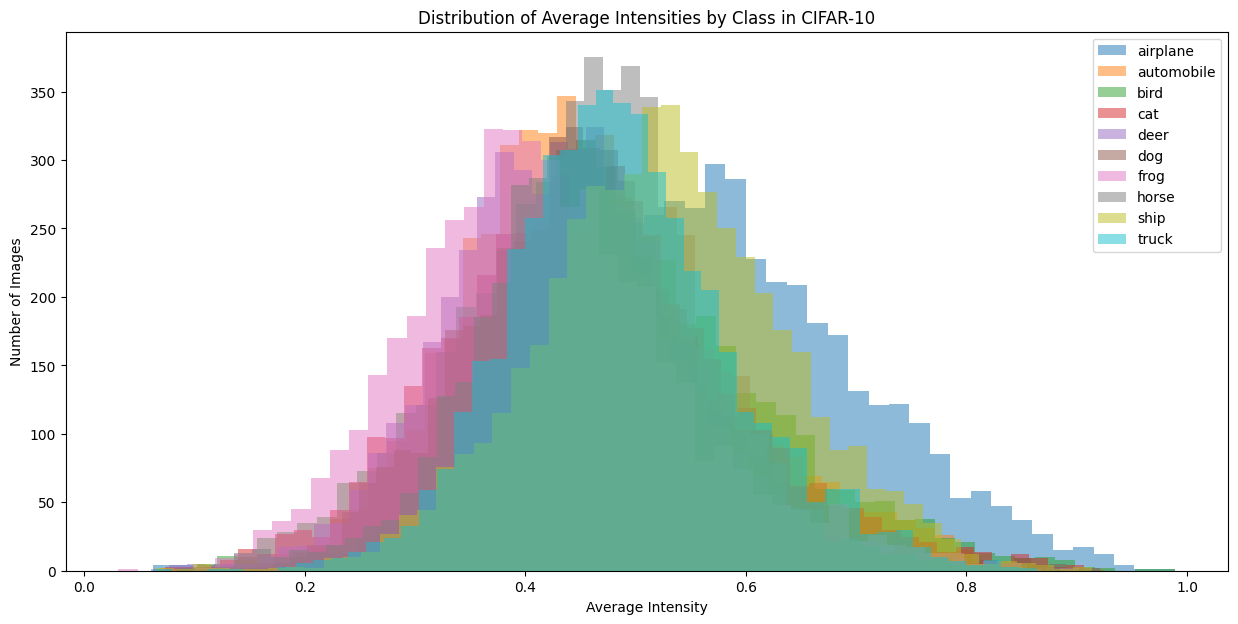

In [9]:
# Compute the average intensity for each image
avg_intensities = np.mean(train_images_cifar, axis=(1, 2, 3))

# Plotting
plt.figure(figsize=(15, 7))
labels_cifar = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i, label in enumerate(labels_cifar):
    label_avg_intensities = avg_intensities[train_labels_cifar[:, 0] == i]
    plt.hist(label_avg_intensities, bins=50, alpha=0.5, label=label)

plt.xlabel('Average Intensity')
plt.ylabel('Number of Images')
plt.title('Distribution of Average Intensities by Class in CIFAR-10')
plt.legend()
plt.show()

### Analysis & Insights:

Upon observing the histogram, we can discern that the average intensities of images from different classes in the CIFAR-10 dataset follow a roughly normal (Gaussian) distribution. However, the mean intensities of these distributions vary by class. Here's a deeper analysis:

1. **Animal Classes**: Classes such as "bird", "cat", "deer", "dog", and "frog" predominantly lie in the left side (lower end) of the intensity spectrum. This suggests that images in these classes, on average, tend to be darker. A possible reason for this could be the natural backgrounds associated with these images. For instance, a frog in a pond or a bird in the shade of trees would result in a darker image. 

2. **Transport Classes**: On the other hand, classes like "airplane" and "ship" lean towards the right side (higher end) of the intensity spectrum, indicating that these images, on average, are brighter. This makes intuitive sense, considering the typical backgrounds for these images. Airplanes are often captured against the backdrop of a bright sky, while ships are commonly seen surrounded by reflective water or bright skies.

### Implications:

Understanding these patterns has several practical implications:

1. **Model Bias**: If a machine learning model is biased towards predicting brighter images as "airplanes" or "ships" (due to their training data distribution), it may make incorrect predictions when faced with uncommon scenarios, like a darkly lit ship image during a storm.

2. **Preprocessing & Augmentation**: Knowing that animal images are generally darker, one might consider applying brightness-enhancing transformations specifically for these classes during data augmentation. This could potentially help in improving model robustness by presenting it with a wider range of brightness levels during training.

3. **Feature Extraction**: The average intensity could serve as an additional feature for simpler machine learning models. Given its class-specific distribution, it might hold discriminative power.

### Conclusion:

The brightness or intensity distribution of images within a dataset can reveal significant patterns about the inherent biases and characteristics of the data. By being aware of these patterns, we can make more informed decisions during the modeling process, aiming for better generalization and performance.

---

### Analysis of Image Average Intensity for Specific Classes

In the vast landscape of image datasets, different classes may inherently present variations in brightness or intensity. To delve deeper into this, we've decided to specifically focus on two distinct classes: "Airplane" and "Frog". The objective is to discern if there are noticeable differences in the intensity of images between these two classes.

Utilizing a box and whisker plot, commonly referred to as a "boxplot", we can visualize and compare the median values, interquartile ranges, and potential outliers for both classes. By overlaying a `swarmplot`, the distribution of each individual data point is made evident, providing richer context to the overall picture.

The selection of these two specific classes is intentional, allowing us to analyze if their natural environmental settings (bright skies for airplanes and potentially dimmer, natural settings for frogs) have an impact on the average image intensity. We anticipate that understanding these differences might offer insights into image characteristics.

c:\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


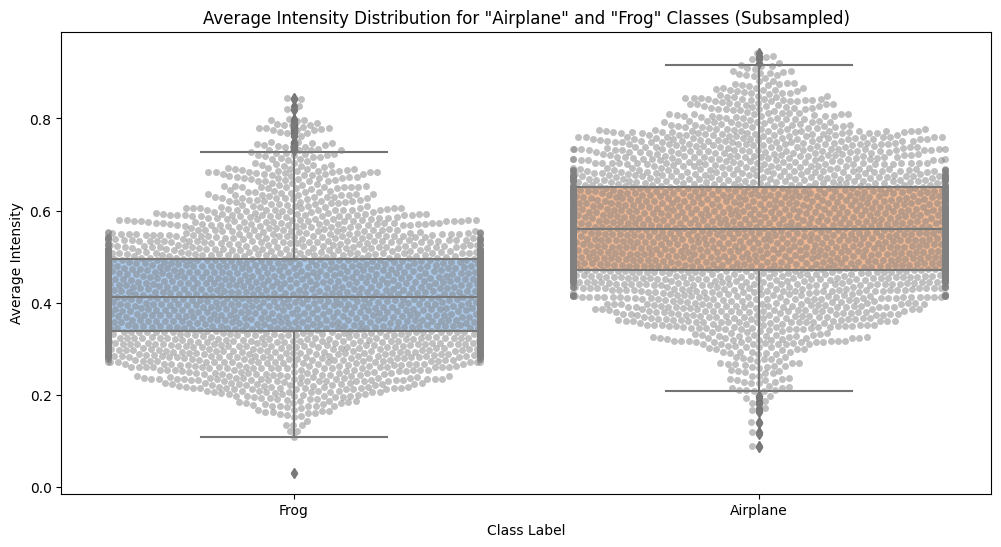

In [10]:
# Create a DataFrame with class labels and corresponding average intensity values
data = pd.DataFrame({'Class Label': train_labels_cifar.flatten(), 'Average Intensity': avg_intensities})

# Map class labels to class names
class_names = {0: 'Airplane', 6: 'Frog'}
data['Class Label'] = data['Class Label'].map(class_names)

# Filter data for classes 'Airplane' and 'Frog'
class_labels = ['Airplane', 'Frog']
filtered_data = data[data['Class Label'].isin(class_labels)]

# Subsample data for visualization
subsampling_ratio = 0.5 # Adjust the subsampling ratio as desired
filtered_data = filtered_data.sample(frac=subsampling_ratio, random_state=42)

# Using boxplot for better visualization of the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class Label', y='Average Intensity', data=filtered_data, palette="pastel")
sns.swarmplot(x='Class Label', y='Average Intensity', data=filtered_data, color='grey', alpha=0.5)
plt.ylabel('Average Intensity')
plt.title('Average Intensity Distribution for "Airplane" and "Frog" Classes (Subsampled)')
plt.show()


### RGB Channel Distribution Analysis for "Airplane" and "Frog" Classes

Following our earlier observations that the "Airplane" and "Frog" classes exhibit differing intensity distributions, we delve further to investigate the distribution across the individual Red, Green, and Blue (RGB) channels. 

Given the varying natural hues associated with these classes, this examination will provide insights into which color channels contribute most to the overall intensity differences. For instance, airplanes, predominantly shot against blue skies, may show higher intensities in the blue channel, while frogs, associated with green environments, might be more prominent in the green channel.

Let's visually analyze the RGB channel distributions for the two selected classes:

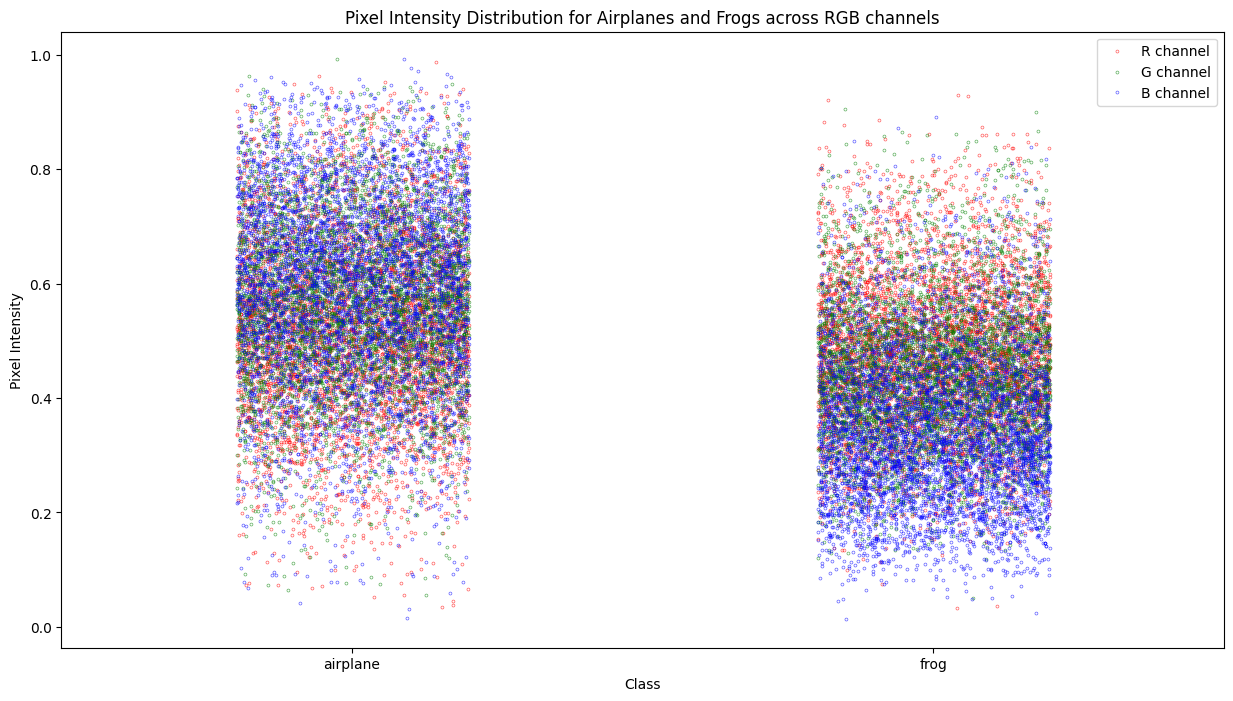

In [11]:
# Extracting 'airplane' and 'frog' classes
airplane_class_id = 0  # Airplane class label in CIFAR-10
frog_class_id = 6     # Frog class label in CIFAR-10

airplane_images = train_images_cifar[train_labels_cifar.flatten() == airplane_class_id]
frog_images = train_images_cifar[train_labels_cifar.flatten() == frog_class_id]

# Calculate mean intensities
airplane_intensities = np.mean(airplane_images, axis=(1,2))
frog_intensities = np.mean(frog_images, axis=(1,2))

# Creating labels for the plot
airplane_labels = ['airplane'] * len(airplane_images)
frog_labels = ['frog'] * len(frog_images)

# Defining colors and channel_ids again
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)
labels = ['Airplanes', 'Frogs']

# Using a stripplot for visualization
plt.figure(figsize=(15, 8))

# Plotting for R, G, B channels of airplanes and frogs
for channel_id, c in zip(channel_ids, colors):
    sns.stripplot(x=np.concatenate([airplane_labels, frog_labels]),
                  y=np.concatenate([airplane_intensities[:, channel_id], frog_intensities[:, channel_id]]),
                  jitter=0.2, marker="$\circ$", alpha=0.6, size=4,
                  color=c, label=f'{c.upper()} channel')

plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.title('Pixel Intensity Distribution for Airplanes and Frogs across RGB channels')

# Handling duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


#### Insights:

The stripplot gives us a detailed view of how pixel intensities are distributed for the "airplanes" and "frogs" classes across the RGB channels:

1. **Pixel Intensity Variation**: As observed, airplanes predominantly have pixel intensities centered towards the higher end, indicating brighter or more vibrant images. In contrast, frog images lean towards the lower end of pixel intensities, suggesting that they might be more subdued or darker in comparison.

2. **Blue Channel Dominance**: Both airplanes and frogs exhibit a noticeable amount of data points in the blue channel. For airplanes, the blue intensities are skewed towards the brighter side, which could be attributed to the sky in many airplane images. For frogs, the blue intensities are more subdued, which might indicate water bodies or darker natural settings commonly associated with frogs.

3. **Environmental Context**: The pixel intensity distribution gives us a hint about the natural environments these objects are usually found in. Airplanes, often photographed against a bright sky, show a dominance in the higher pixel intensity range. Frogs, commonly found in darker wetlands or green vegetation, reflect lower pixel intensities.

Understanding such nuances of our data can guide us in designing better image preprocessing pipelines or augmentations. If a model struggles with recognizing frogs, for instance, we might consider brightness augmentation to diversify the training set.

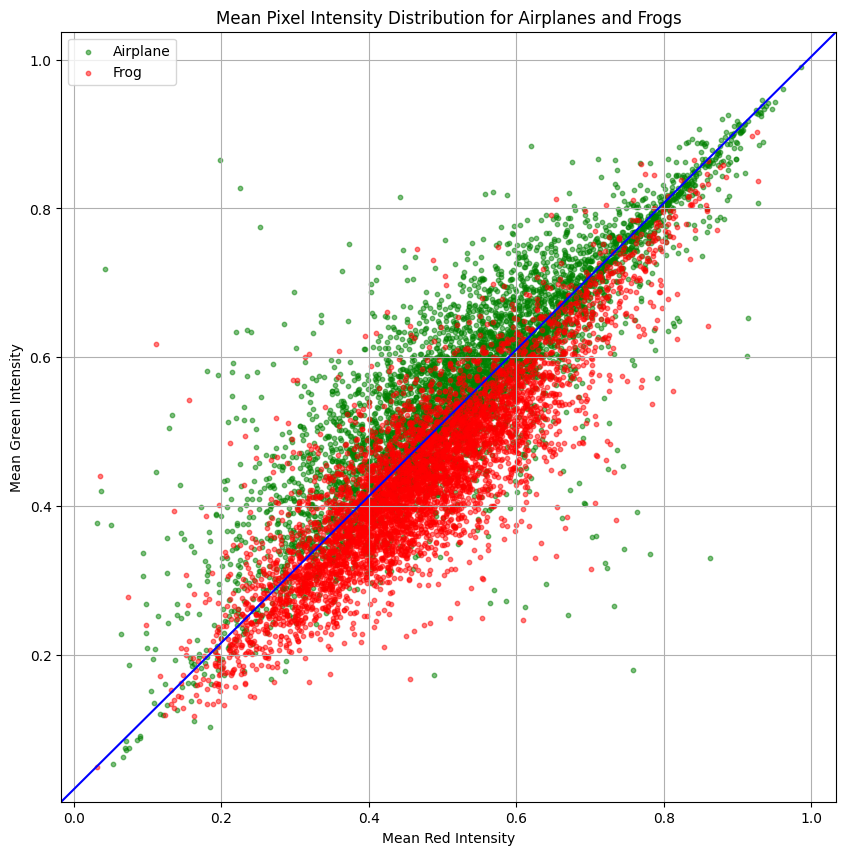

In [12]:
# Extract mean pixel intensities for airplanes and frogs
airplane_intensities = np.mean(train_images_cifar[train_labels_cifar.ravel() == 0], axis=(1, 2))
frog_intensities = np.mean(train_images_cifar[train_labels_cifar.ravel() == 6], axis=(1, 2))

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(airplane_intensities[:, 0], airplane_intensities[:, 1], color='g', label='Airplane', alpha=0.5, s=10)
plt.scatter(frog_intensities[:, 0], frog_intensities[:, 1], color='r', label='Frog', alpha=0.5, s=10)

# Diagonal line
plt.plot([0, 1], [0, 1], color='b', transform=plt.gca().transAxes)

plt.xlabel('Mean Red Intensity')
plt.ylabel('Mean Green Intensity')
plt.title('Mean Pixel Intensity Distribution for Airplanes and Frogs')
plt.legend()
plt.grid(True)
plt.show()


#### Insights:


The diagonal blue line in the scatter plot essentially represents an axis of equivalence between the mean red and green intensities. Observing that this line almost bisects the two clusters of points—representing the airplane and frog classes—suggests that there's a distinguishable difference in the color characteristics between the two classes. In simpler terms, while an airplane image might have a certain red intensity, it will have a corresponding green intensity that's notably different from a frog image with the same red intensity, and vice versa.

This distinction is invaluable for several reasons:

1. **Feature Importance:** The fact that the two classes can be somewhat differentiated based on their color characteristics means that these features (mean red and green intensities) are important. When training a machine learning model, it would be beneficial to emphasize these characteristics, knowing that they can assist in discriminating between the two classes.

2. **Model Interpretability:** Should a trained model make an unexpected prediction, analyzing the color characteristics of the image in question can help in diagnosing whether the image's features align more closely with the typical features of the predicted class or the actual class.

3. **Potential for Simplified Models:** Given the clear distinction in color characteristics, simpler models or models with fewer parameters might still achieve reasonable accuracy. This can lead to faster training times and reduced computational costs.

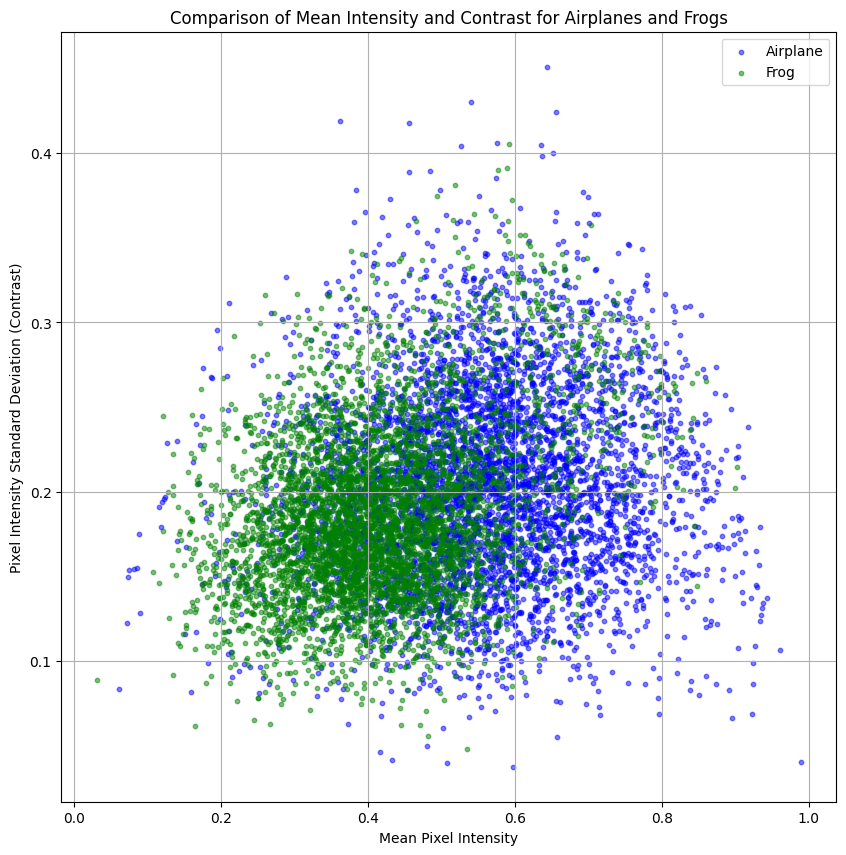

In [13]:
# # Extracting mean pixel intensities for the classes "Airplanes" and "Frogs"
airplane_mean_intensities = np.mean(train_images_cifar[train_labels_cifar.ravel() == 0], axis=(1, 2, 3))
frog_mean_intensities = np.mean(train_images_cifar[train_labels_cifar.ravel() == 6], axis=(1, 2, 3))

# Calculating the standard deviation for each image for the classes "Airplanes" and "Frogs"
airplane_std_intensities = np.std(train_images_cifar[train_labels_cifar.ravel() == 0], axis=(1, 2, 3))
frog_std_intensities = np.std(train_images_cifar[train_labels_cifar.ravel() == 6], axis=(1, 2, 3))

# Scatter plot with the correct color scheme
plt.figure(figsize=(10, 10))
plt.scatter(airplane_mean_intensities, airplane_std_intensities, color='b', alpha=0.5, s=10, label='Airplane')
plt.scatter(frog_mean_intensities, frog_std_intensities, color='g', alpha=0.5, s=10, label='Frog')

plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Pixel Intensity Standard Deviation (Contrast)')
plt.title('Comparison of Mean Intensity and Contrast for Airplanes and Frogs')
plt.legend()
plt.grid(True)
plt.show()


### Analysis:

The plot represents the distribution of images in terms of their average pixel intensity (on the x-axis) and their contrast, measured by standard deviation (on the y-axis). This provides a view of how images are spread across these two dimensions.

- **Blue dots** represent the airplane images.
- **Green dots** represent the frog images.

There appears to be some separation between the two classes. The airplane images tend to have higher contrast (higher standard deviation), while the frog images are more concentrated around the lower contrast values.

This insight can be valuable when determining the characteristics of different image classes. For instance, if we employ contrast enhancement techniques as preprocessing, we might expect it to have a more pronounced effect on frog images compared to airplane images.


### Contrast Enhancement

Contrast enhancement can be done by using the formula:
\[ \text{enhanced_pixel} = ( \text{original_pixel} - \text{min} ) \times \frac{255}{\text{max} - \text{min}} \]
where `min` and `max` are the minimum and maximum pixel values in the image, respectively.

Let's apply this formula to the frog images:

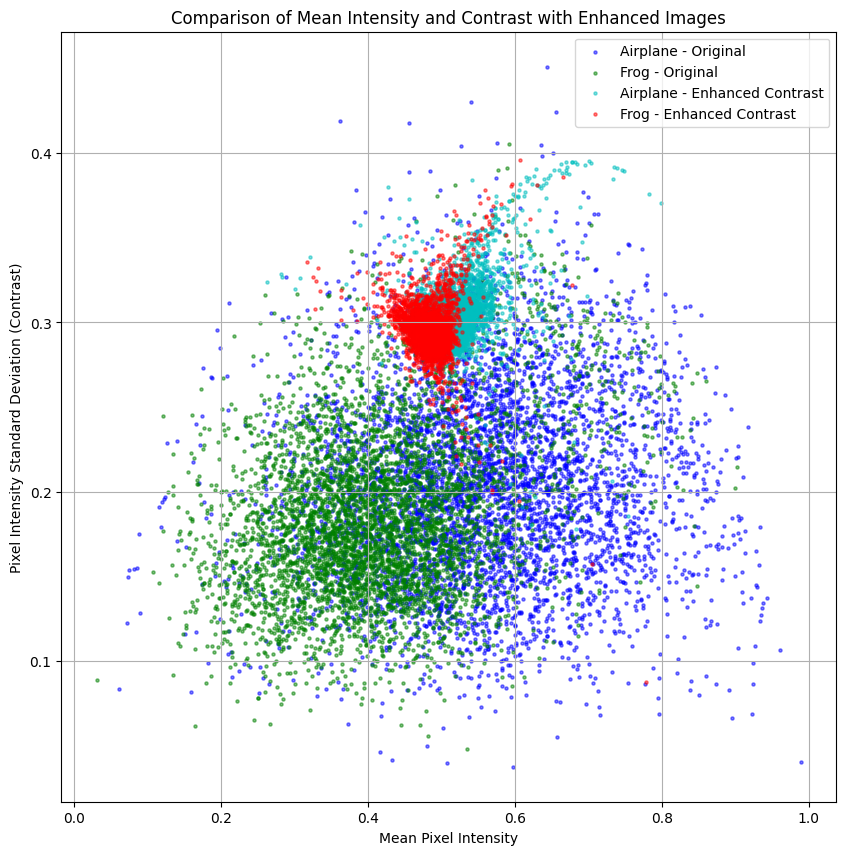

In [14]:
import cv2

def enhance_contrast(img):
    # Rescale image to 0-255 range and convert to uint8
    rescaled_img = (img * 255).astype(np.uint8)
    
    img_yuv = cv2.cvtColor(rescaled_img, cv2.COLOR_RGB2YUV)
    
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output / 255  # Normalize to [0, 1]

enhanced_frog_images = np.array([enhance_contrast(img) for img in train_images_cifar[train_labels_cifar.ravel() == 6]])
enhanced_airplane_images = np.array([enhance_contrast(img) for img in train_images_cifar[train_labels_cifar.ravel() == 0]])

# Extracting mean pixel intensities and std deviation for the enhanced frogs and airplanes
enhanced_frog_mean_intensities = np.mean(enhanced_frog_images, axis=(1, 2, 3))
enhanced_frog_std_intensities = np.std(enhanced_frog_images, axis=(1, 2, 3))

enhanced_airplane_mean_intensities = np.mean(enhanced_airplane_images, axis=(1, 2, 3))
enhanced_airplane_std_intensities = np.std(enhanced_airplane_images, axis=(1, 2, 3))

# Scatter plot with the original and enhanced frog & airplane distributions
plt.figure(figsize=(10, 10))
plt.scatter(airplane_mean_intensities, airplane_std_intensities, color='b', alpha=0.5, s=5, label='Airplane - Original')
plt.scatter(frog_mean_intensities, frog_std_intensities, color='g', alpha=0.5, s=5, label='Frog - Original')
plt.scatter(enhanced_airplane_mean_intensities, enhanced_airplane_std_intensities, color='c', alpha=0.5, s=5, label='Airplane - Enhanced Contrast')
plt.scatter(enhanced_frog_mean_intensities, enhanced_frog_std_intensities, color='r', alpha=0.5, s=5, label='Frog - Enhanced Contrast')

plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Pixel Intensity Standard Deviation (Contrast)')
plt.title('Comparison of Mean Intensity and Contrast with Enhanced Images')
plt.legend()
plt.grid(True)
plt.show()


### **Analysis of Contrast Enhancement on CIFAR-10 Classes**

After applying contrast enhancement to the images of the "Airplane" and "Frog" classes from the CIFAR-10 dataset, a noticeable shift in their positions on the scatter plot is observed.

**Observations**:
- The **original** "Airplane" and "Frog" classes are distributed more widely on the scatter plot in terms of mean pixel intensity and contrast.
- The **contrast-enhanced** "Airplane" and "Frog" classes are more clustered towards the center-upper part of the plot. This indicates a more uniform mean intensity and higher contrast compared to their original states.

**Conclusions**:
- **Contrast Enhancement** tends to centralize the images in terms of mean intensity, making them more consistent with each other within the same class.
- Enhanced images show a **higher contrast**, as they are positioned more towards the upper section of the plot.
- The spread or variability of mean intensities decreases with enhancement, making the images within each class more homogeneous in terms of brightness.

This analysis shows the power of image preprocessing in changing the inherent properties of images, which might influence the behavior and performance of machine learning models trained on such data.

**Displaying  a few sample images side-by-side is a good way to visually comprehend the effects of the contrast enhancement. This code plots 5 sample images for each class side-by-side, where the top row consists of original images, and the bottom row consists of their contrast-enhanced versions.**

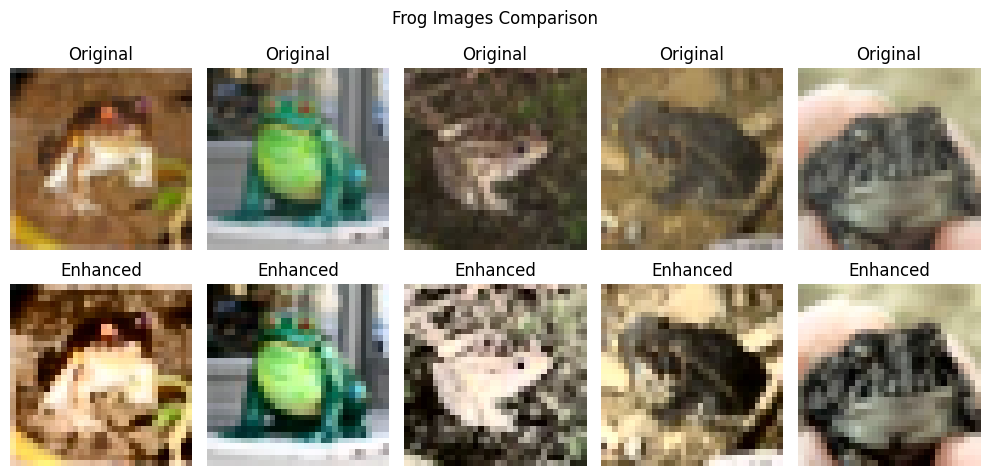

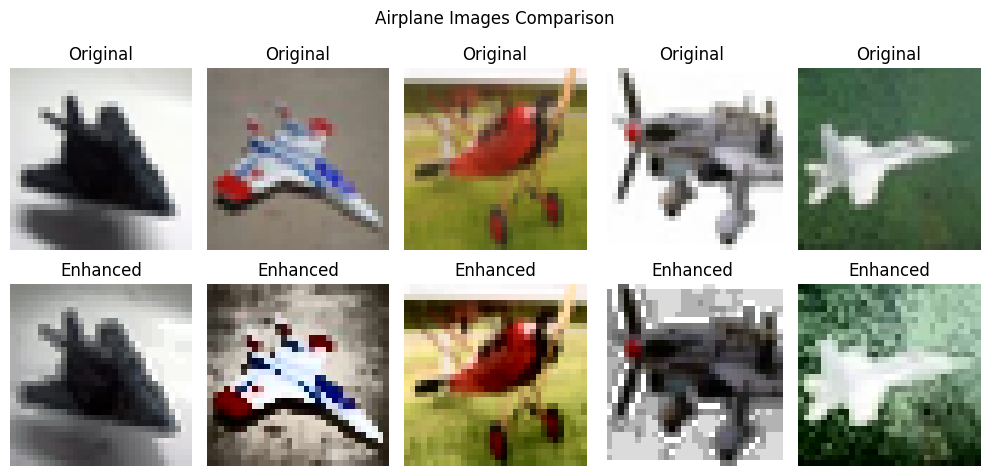

In [15]:
def plot_sample_images(original_images, enhanced_images, title):
    """
    Display a side-by-side comparison of original and enhanced images.
    """
    plt.figure(figsize=(10, 5))
    
    for i in range(len(original_images)):
        # Original Images
        plt.subplot(2, len(original_images), i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')
        
        # Enhanced Images
        plt.subplot(2, len(enhanced_images), i + 1 + len(enhanced_images))
        plt.imshow(enhanced_images[i])
        plt.title("Enhanced")
        plt.axis('off')
        
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Sample of original and enhanced frog images
frog_samples = train_images_cifar[train_labels_cifar.ravel() == 6][:5]
enhanced_frog_samples = [enhance_contrast(img) for img in frog_samples]

plot_sample_images(frog_samples, enhanced_frog_samples, "Frog Images Comparison")

# Sample of original and enhanced airplane images
airplane_samples = train_images_cifar[train_labels_cifar.ravel() == 0][:5]
enhanced_airplane_samples = [enhance_contrast(img) for img in airplane_samples]

plot_sample_images(airplane_samples, enhanced_airplane_samples, "Airplane Images Comparison")


### Results:

Upon examining the visual comparisons, we can observe a notable alteration in the images that underwent contrast enhancement. The images with increased contrast exhibit a loss in detail quality, especially in regions with subtle variations in color and texture. Such degradation might hinder further image processing tasks or model training, as essential information might be suppressed or distorted.

While contrast enhancement can make certain features more pronounced, overdoing it might compromise the fidelity of the image. It's crucial to strike a balance to ensure that the enhanced images retain the necessary details while still benefiting from the increased contrast.

---

Edge detection is a technique used in image processing to identify boundaries within an image. It works by detecting discontinuities in brightness. Algorithms such as Canny or Sobel are widely used for this purpose. The Canny edge detection algorithm, in particular, operates by identifying the areas of the image with a rapid change in intensity and color. In this section, we will employ the Canny edge detection method on both the airplane and frog classes to examine their structure. By adjusting the threshold values, we can control the sensitivity of the edge detection, which might allow us to discern finer details.

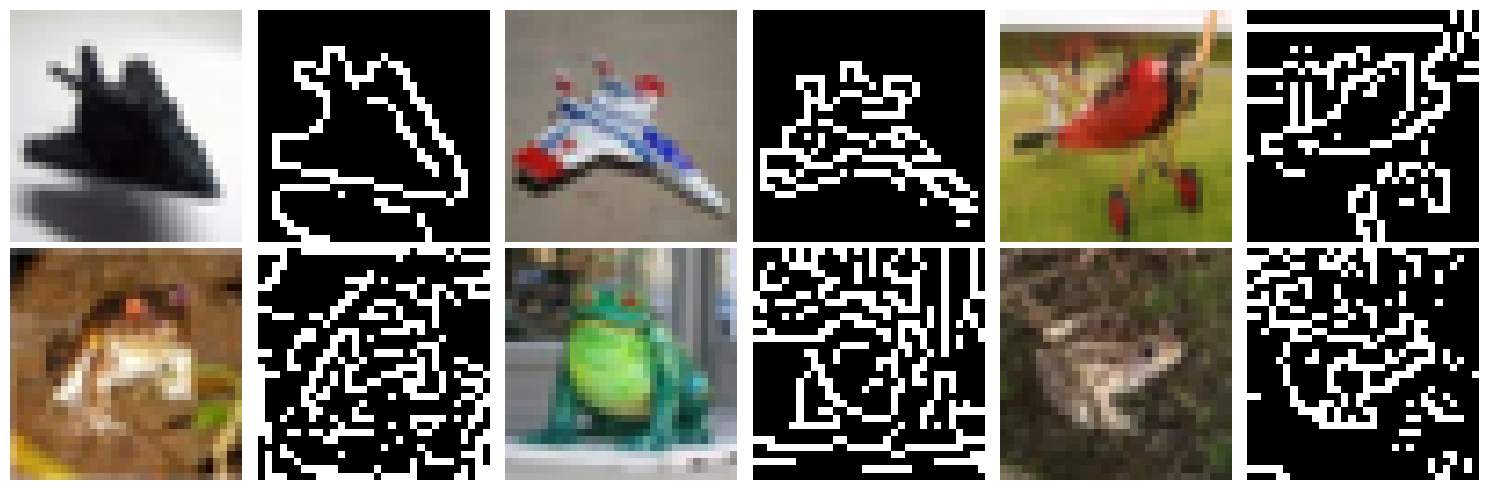

In [16]:
# Extract airplane and frog classes from the dataset
airplanes = train_images_cifar[train_labels_cifar.ravel() == 0]
frogs = train_images_cifar[train_labels_cifar.ravel() == 6]

def edge_detection(images, lower_threshold=50, upper_threshold=150):
    edges_detected = []
    for img in images:
        # Rescale the image to 0-255 range and convert to uint8
        rescaled_img = (img * 255).astype(np.uint8)
        # Detect edges using Canny
        edges = cv2.Canny(rescaled_img, lower_threshold, upper_threshold)
        edges_detected.append(edges)
    return np.array(edges_detected)

# Detect edges for both classes
airplane_edges = edge_detection(airplanes, 100, 130)
frog_edges = edge_detection(frogs, 120, 130)

# Displaying few examples
fig, axes = plt.subplots(2, 6, figsize=(15, 5))

for i in range(3):
    axes[0, i * 2].imshow(airplanes[i])
    axes[0, i * 2 + 1].imshow(airplane_edges[i], cmap="gray")
    axes[1, i * 2].imshow(frogs[i])
    axes[1, i * 2 + 1].imshow(frog_edges[i], cmap="gray")

axes[0, 0].set_ylabel("Airplanes", size=15)
axes[1, 0].set_ylabel("Frogs", size=15)

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()



Upon observing the results, we can see the structural outlines of both the airplanes and frogs. The reduced threshold values make the edges appear thinner, which can be useful for discerning finer structural details. Such processed images can be beneficial in various applications, like object recognition, where the structure or shape of objects is more important than their texture or color. However, it's crucial to choose appropriate threshold values to capture the essential details without introducing too much noise.

---

### Image Filters: Blur and Sharpness

In image processing, filters are used to modify or enhance an image. Two commonly used filters are the **Gaussian Blur** and the **Sharpening Filter**:

1. **Gaussian Blur**: This filter is used to smooth an image to reduce detail and noise. It can be especially helpful in suppressing small fluctuations and revealing larger, structural details.
2. **Sharpening Filter**: This filter is used to emphasize the details in an image. It accentuates the edges by enhancing the contrast around them.

In the following code, we'll apply both of these filters to samples of our airplane and frog images. This will give us a visual understanding of how these filters transform the image data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

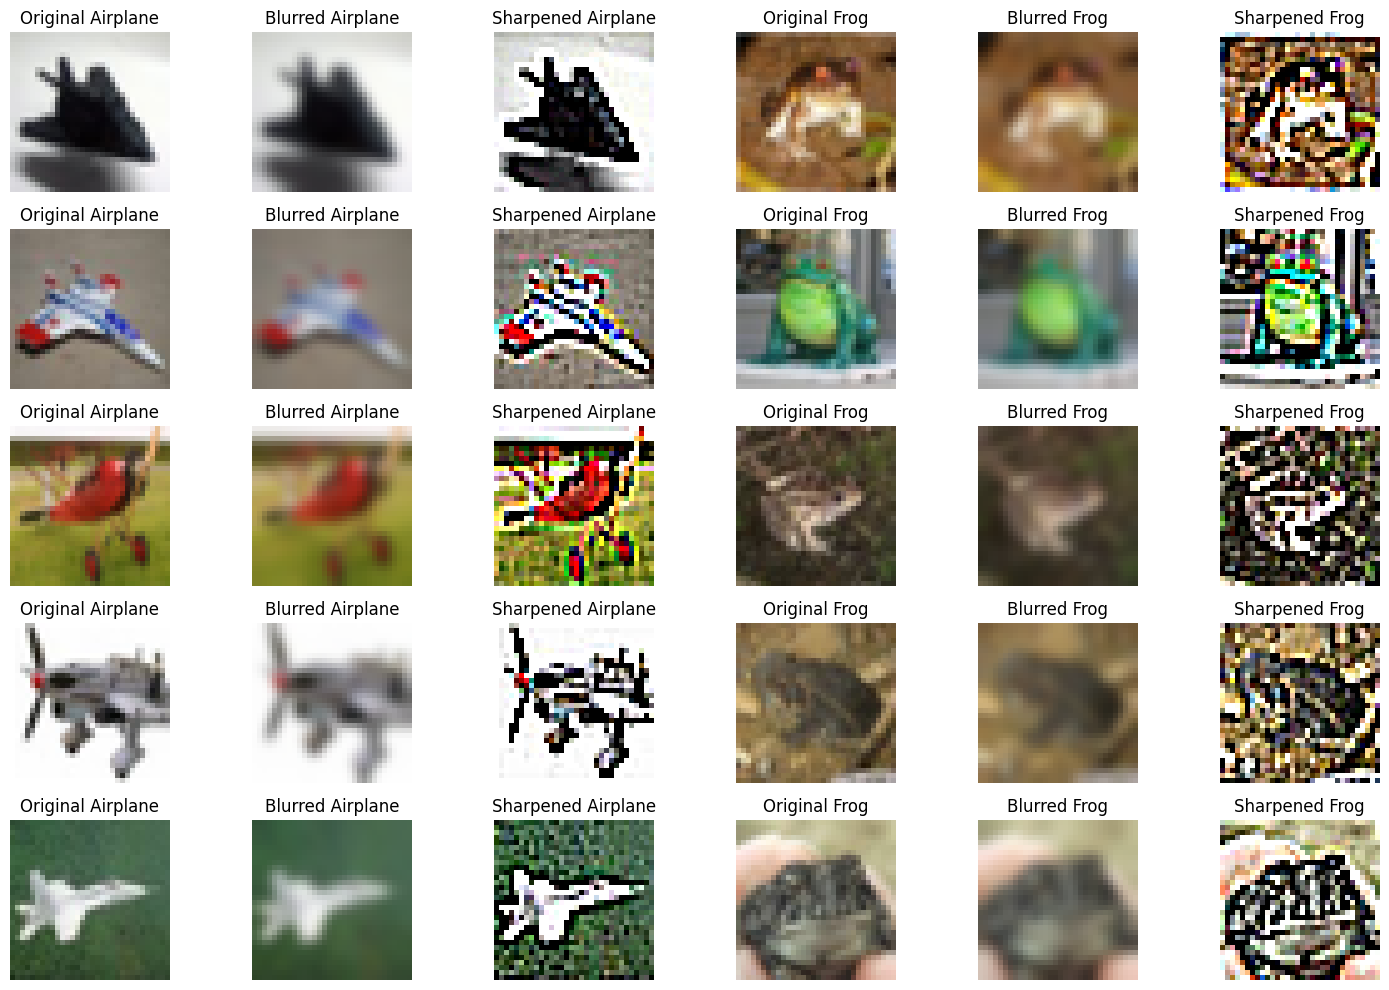

In [17]:
# Function to apply Gaussian blur
def apply_gaussian_blur(img):
    return cv2.GaussianBlur(img, (5,5), 0)

# Function to apply sharpening using kernel convolution
def apply_sharpening(img):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

# Get a subset of airplane and frog images
sample_airplanes = train_images_cifar[train_labels_cifar.ravel() == 0][:5]
sample_frogs = train_images_cifar[train_labels_cifar.ravel() == 6][:5]

# Apply the filters
blurred_airplanes = [apply_gaussian_blur(img) for img in sample_airplanes]
sharpened_airplanes = [apply_sharpening(img) for img in sample_airplanes]

blurred_frogs = [apply_gaussian_blur(img) for img in sample_frogs]
sharpened_frogs = [apply_sharpening(img) for img in sample_frogs]

# Visualization
fig, axes = plt.subplots(5, 6, figsize=(15,10))

for i, ax in enumerate(axes):
    ax[0].imshow(sample_airplanes[i])
    ax[0].set_title('Original Airplane')
    ax[0].axis('off')

    ax[1].imshow(blurred_airplanes[i])
    ax[1].set_title('Blurred Airplane')
    ax[1].axis('off')

    ax[2].imshow(sharpened_airplanes[i])
    ax[2].set_title('Sharpened Airplane')
    ax[2].axis('off')

    ax[3].imshow(sample_frogs[i])
    ax[3].set_title('Original Frog')
    ax[3].axis('off')

    ax[4].imshow(blurred_frogs[i])
    ax[4].set_title('Blurred Frog')
    ax[4].axis('off')

    ax[5].imshow(sharpened_frogs[i])
    ax[5].set_title('Sharpened Frog')
    ax[5].axis('off')

plt.tight_layout()
plt.show()


### Observations:

From the side-by-side comparisons:

1. The Gaussian blur effectively reduces the image details. This can be observed as a smoother texture in the blurred images. While this might suppress noise, important features might also be lost, which could be significant depending on the downstream tasks (like object recognition).
2. The sharpening filter brings out the details and makes edges more pronounced. This can be beneficial for tasks that require the detection of intricate patterns or features. However, over-sharpening might introduce artifacts that weren't present in the original image.

Using these filters judiciously can aid in various image processing tasks, but the choice of filter and its intensity should be aligned with the goals of the analysis.

---

[Back to Main](../Project.ipynb)